In [ ]:
!pip install nolds
!pip install keras-tuner
!pip install xgboost

In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


Best hyperparameter configuration:
activation: relu

alpha: 0.009817120953891038

early_stopping: True

hidden_layer_sizes: (128, 64)

learning_rate_init: 0.007847065437552076

max_iter: 1000


In [ ]:
# Load data
df2 = pd.read_csv("/content/final_dataset_1.csv")
df2["date"] = pd.to_datetime(df2["date"])
df2 = df2.dropna()

df=df2.copy()

df


,date,Crude Oil Prices: Brent - Europe,sentiment,Closing Coal Prices,global_clean_index,production volume in industry,EU Natural Gas Prices,"Price Index for Consumer: Energy(electricity, heat, fuel)",euro_stoxx,ecb_interest_rate,...,euro_stoxx_lag1,"Price Index for Consumer: Energy(electricity, heat, fuel) _lag2",Crude Oil Prices: Brent - Europe_lag2,euro_stoxx_lag2,"Price Index for Consumer: Energy(electricity, heat, fuel) _lag3",Crude Oil Prices: Brent - Europe_lag3,euro_stoxx_lag3,label_lag1,label_lag2,label_lag3
0,2015-04-19,61.31,0.000000,59.95,800.15,95.620000,7.378000,99.792000,3674.05,0.05,...,3751.72,99.842667,59.32,3803.55,99.855333,57.69,3784.53,7.13,6.84,6.87
1,2015-04-20,61.20,0.000000,59.90,792.32,95.643333,7.377333,99.779333,3718.04,0.05,...,3674.05,99.830000,60.13,3751.72,99.842667,59.32,3803.55,7.08,7.13,6.84
2,2015-04-21,60.12,0.868889,59.75,798.27,95.666667,7.376667,99.766667,3719.38,0.05,...,3718.04,99.792000,61.31,3674.05,99.830000,60.13,3751.72,7.09,7.08,7.13
3,2015-04-22,60.12,0.000000,59.55,804.44,95.690000,7.376000,99.754000,3724.49,0.05,...,3719.38,99.779333,61.20,3718.04,99.792000,61.31,3674.05,7.25,7.09,7.08
4,2015-04-23,62.66,0.000000,59.60,812.45,95.713333,7.375333,99.741333,3697.88,0.05,...,3724.49,99.766667,60.12,3719.38,99.779333,61.20,3718.04,7.28,7.25,7.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,2025-03-27,74.72,0.948383,97.60,736.13,97.900000,13.128000,166.520000,5381.08,2.65,...,5411.69,166.520000,73.78,5475.08,166.520000,73.96,5415.79,67.91,67.66,69.91
2366,2025-03-30,74.69,0.000000,101.30,736.58,97.900000,13.128000,166.520000,5331.40,2.65,...,5381.08,166.520000,74.60,5411.69,166.520000,73.78,5475.08,67.13,67.91,67.66
2367,2025-03-31,77.23,-0.956960,104.20,725.99,97.900000,13.128000,166.520000,5248.39,2.65,...,5331.40,166.520000,74.72,5381.08,166.520000,74.60,5411.69,68.98,67.13,67.91
2368,2025-04-01,77.78,0.742659,105.75,732.81,97.900000,13.128000,166.520000,5320.30,2.65,...,5248.39,166.520000,74.69,5331.40,166.520000,74.72,5381.08,67.69,68.98,67.13


In [ ]:

# Target and features
# target_col = "label_lag1"
target_col = "label"
# X = df.drop(columns=["label_lag1","label_lag2","label_lag3", "date", target_col])
X = df.drop(columns=["date", target_col])
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_scaled=X_train

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train_scaled)
X_test = scaler.transform(X_test)


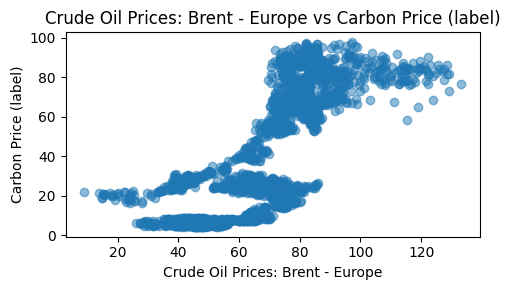

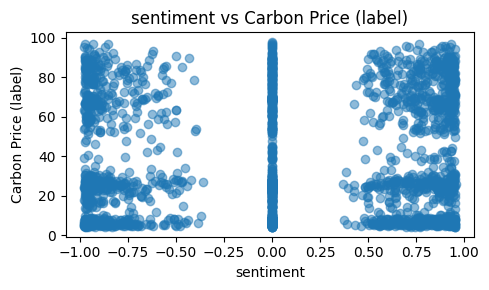

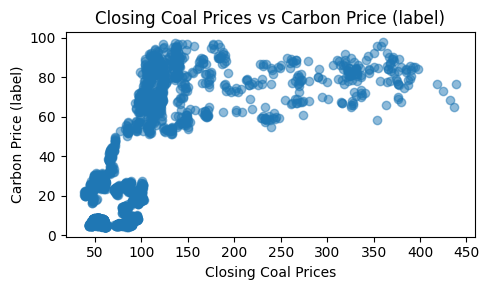

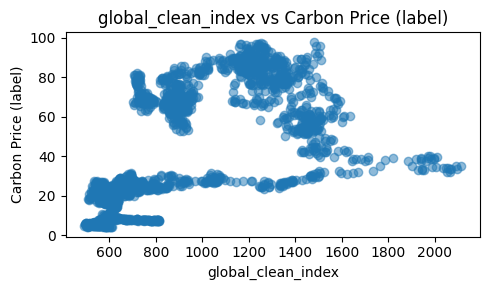

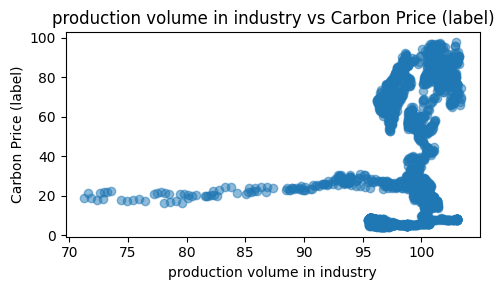

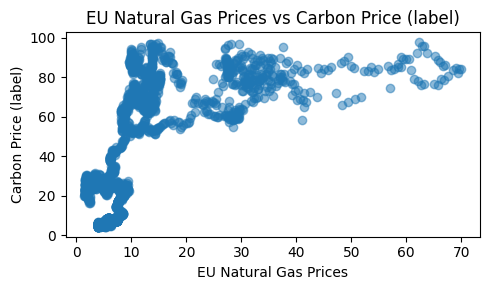

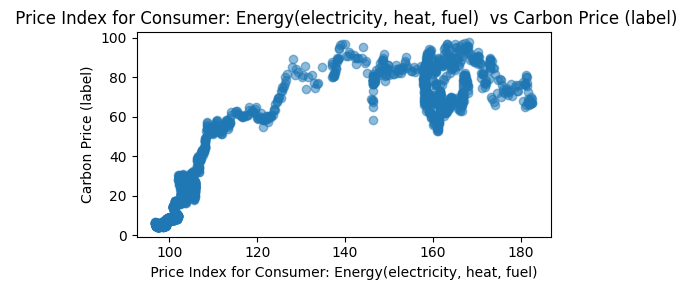

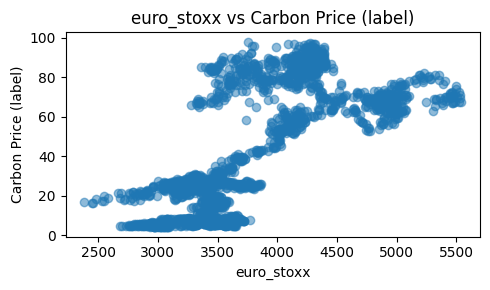

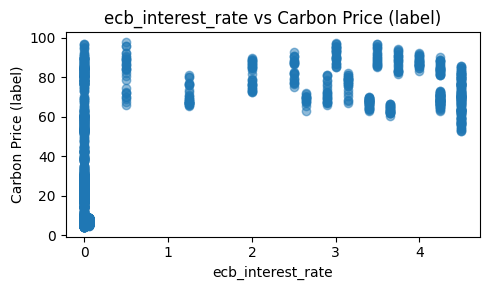

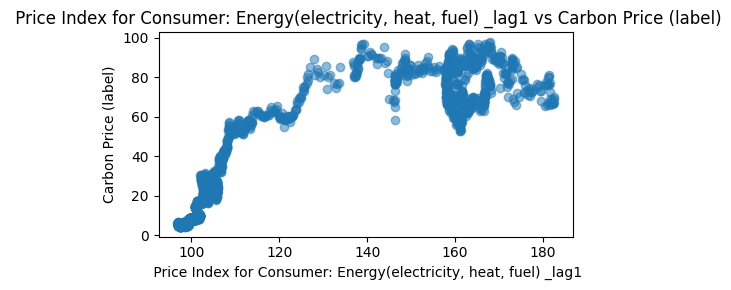

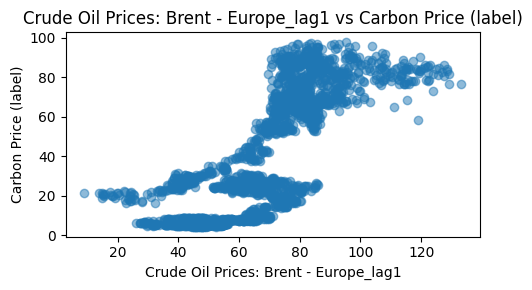

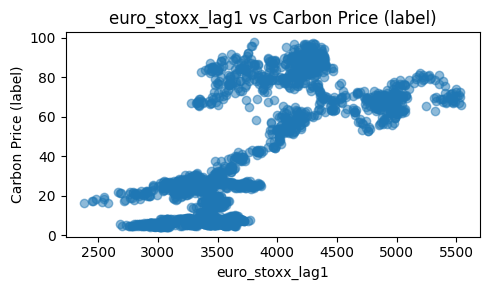

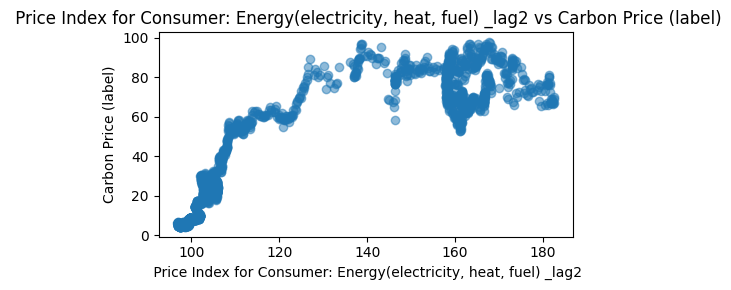

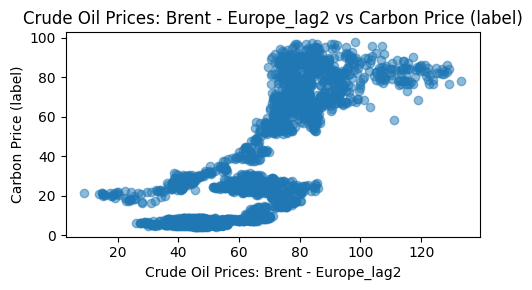

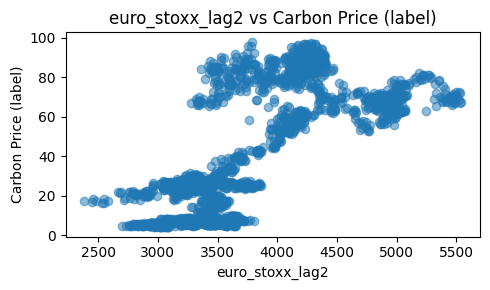

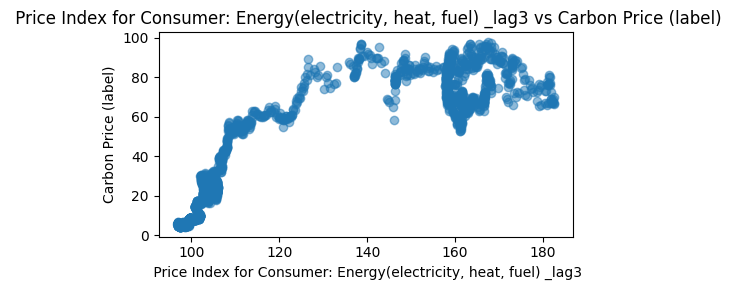

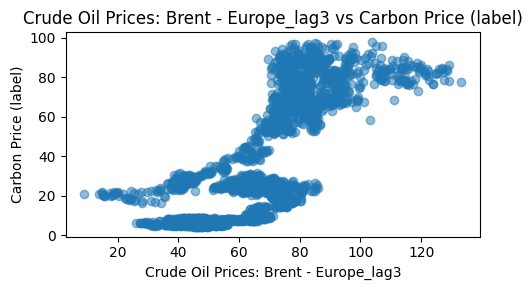

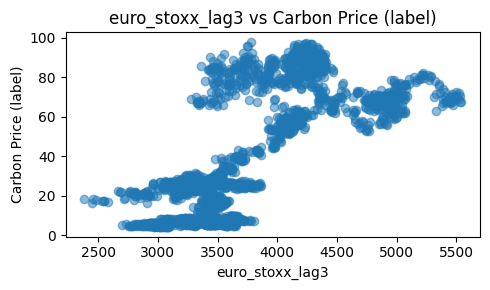

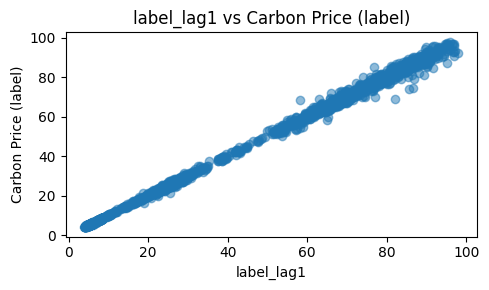

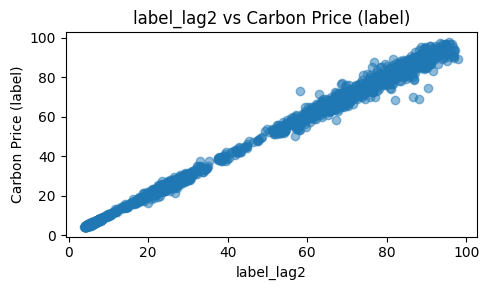

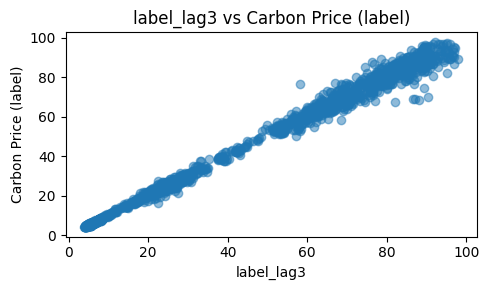

In [ ]:
import matplotlib.pyplot as plt

# Plot scatter plots for each feature against the target
for col in X.columns:
    plt.figure(figsize=(5, 3))
    plt.scatter(X[col], y, alpha=0.5)
    plt.title(f"{col} vs Carbon Price (label)")
    plt.xlabel(col)
    plt.ylabel("Carbon Price (label)")
    plt.tight_layout()
    plt.show()


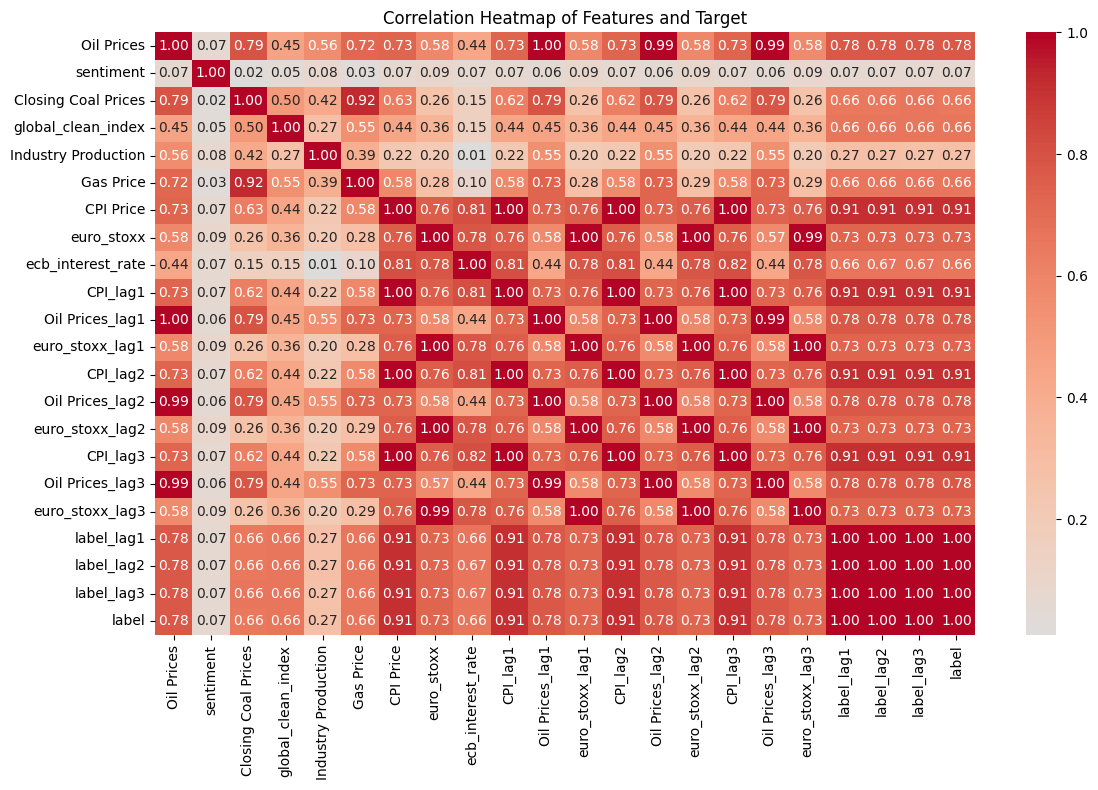

In [ ]:
import seaborn as sns
import numpy as np

# Combine features and target to compute correlation
df_corr = X.copy()
# Rename specific columns
df_corr= df_corr.rename(columns={
    "EU Natural Gas Prices": 'Gas Price',
     "production volume in industry": 'Industry Production',
     " Price Index for Consumer: Energy(electricity, heat, fuel) ": 'CPI Price',
     ' Price Index for Consumer: Energy(electricity, heat, fuel) _lag1': 'CPI_lag1',
     ' Price Index for Consumer: Energy(electricity, heat, fuel) _lag2': 'CPI_lag2',
     ' Price Index for Consumer: Energy(electricity, heat, fuel) _lag3': 'CPI_lag3',
     'Crude Oil Prices: Brent - Europe': 'Oil Prices',
    'Crude Oil Prices: Brent - Europe_lag2': 'Oil Prices_lag2',
    'Crude Oil Prices: Brent - Europe_lag3': 'Oil Prices_lag3',
    'Crude Oil Prices: Brent - Europe_lag1': 'Oil Prices_lag1',

})

df_corr["label"] = y

# Compute correlation matrix
corr = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features and Target")
plt.tight_layout()
plt.show()


In [ ]:
X_train

array([[-0.09169081, -0.04445052, -0.54159712, ..., -0.83959375,
        -0.84955397, -0.84769603],
       [-0.09721228, -0.04445052, -0.54222079, ..., -0.8414397 ,
        -0.83883752, -0.84880565],
       [-0.15142301,  1.23752006, -0.54409179, ..., -0.84107051,
        -0.84068519, -0.83807935],
       ...,
       [ 0.68432576,  1.35175395,  0.4693718 , ...,  2.09620718,
         2.21350063,  2.33764357],
       [ 0.56034381, -1.47759345,  0.4319516 , ...,  2.04525892,
         2.09968463,  2.21706523],
       [ 0.50111356, -0.73667029,  0.4319516 , ...,  2.05633463,
         2.04868915,  2.10314458]])

In [ ]:
X_train_scaled

array([[-0.09169081, -0.04445052, -0.54159712, ..., -0.83959375,
        -0.84955397, -0.84769603],
       [-0.09721228, -0.04445052, -0.54222079, ..., -0.8414397 ,
        -0.83883752, -0.84880565],
       [-0.15142301,  1.23752006, -0.54409179, ..., -0.84107051,
        -0.84068519, -0.83807935],
       ...,
       [ 0.68432576,  1.35175395,  0.4693718 , ...,  2.09620718,
         2.21350063,  2.33764357],
       [ 0.56034381, -1.47759345,  0.4319516 , ...,  2.04525892,
         2.09968463,  2.21706523],
       [ 0.50111356, -0.73667029,  0.4319516 , ...,  2.05633463,
         2.04868915,  2.10314458]])

In [ ]:
# y_train

In [ ]:
X_test

array([[ 3.96205762e-01, -4.44505218e-02,  3.88294711e-01, ...,
         2.04193621e+00,  2.05977512e+00,  2.05210222e+00],
       [ 4.65976980e-01,  1.13980047e+00,  3.88294711e-01, ...,
         2.12315807e+00,  2.04536336e+00,  2.06319838e+00],
       [ 5.84437466e-01,  1.30767597e+00,  4.44425002e-01, ...,
         2.09546880e+00,  2.12666050e+00,  2.04877337e+00],
       ...,
       [ 7.07415512e-01, -1.45636225e+00,  1.03507494e-02, ...,
         1.44384799e+00,  1.37835726e+00,  1.41000403e+00],
       [ 7.35022828e-01,  1.05127861e+00,  2.96845164e-02, ...,
         1.39622245e+00,  1.44672077e+00,  1.38115400e+00],
       [ 7.09423317e-01,  1.09206642e+00,  3.72030939e-04, ...,
         1.30614003e+00,  1.39905108e+00,  1.44958036e+00]])

In [ ]:
y_test

,label
1896,87.38
1897,86.63
1898,90.18
1899,85.40
1900,88.13
...,...
2365,67.13
2366,68.98
2367,67.69
2368,65.25


In [ ]:
from scipy.stats import uniform

In [ ]:
# # You can keep the same param grid, or use distributions
# param_dist = {
#     'hidden_layer_sizes': [(64,), (128,), (128, 64)],
#     'activation': ['relu', 'tanh'],
#     'alpha': uniform(1e-4, 1e-2),  # random float between 0.0001 and 0.0101
#     'learning_rate_init': uniform(0.001, 0.009),  # random float between 0.001 and 0.01
#     'max_iter': [1000],
#     'early_stopping': [True]
# }

# random_search = RandomizedSearchCV(
#     estimator=MLPRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=30,  # try 30 random combinations
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=42,
#     verbose=1,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)
# best_mlp = random_search.best_estimator_
# y_pred = best_mlp.predict(X_test)


# # 1. Plot Training Loss
# plt.figure(figsize=(8, 5))
# plt.plot(best_mlp.loss_curve_, label="Training Loss")
# plt.xlabel("Epochs")
# plt.ylabel("MSE Loss")
# plt.title("MLP Training Loss Curve")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()



# # 2. Plot Validation Loss (if available)
# if hasattr(best_mlp, "validation_scores_"):
#     plt.figure(figsize=(8, 5))
#     plt.plot(best_mlp.loss_curve_, label="Training Loss")
#     plt.plot(best_mlp.validation_scores_, label="Validation Score", linestyle='--')
#     plt.xlabel("Epochs")
#     plt.ylabel("Score (R² or similar)")
#     plt.title("MLP Training vs Validation Curve")
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()
# else:
#     print("Validation scores are not available in this scikit-learn version.")




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Build model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dense(1)  # Output layer for regression
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=400,
    batch_size=32,
    verbose=1,
)

y_pred=model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 1487.9004 - mae: 29.7307 - val_loss: 3802.4197 - val_mae: 60.8414
Epoch 2/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1231.9077 - mae: 27.7639 - val_loss: 2873.3547 - val_mae: 52.6160
Epoch 3/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1045.1127 - mae: 25.6060 - val_loss: 2243.7561 - val_mae: 46.3512
Epoch 4/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 914.2859 - mae: 24.0696 - val_loss: 1538.5553 - val_mae: 38.2465
Epoch 5/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 723.5164 - mae: 22.0393 - val_loss: 1289.3033 - val_mae: 35.1129
Epoch 6/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 498.5866 - mae: 18.6222 - val_loss: 1117.6191 - val_mae: 32.9524
Epoch 7/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 283.8150 - mae: 14.1942 - val_loss: 729.9497 - val_mae: 26.8308
Epoch 8/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 137.6152 - mae: 9.6637 - val_loss: 506.9162 - val_mae: 22.3435
E

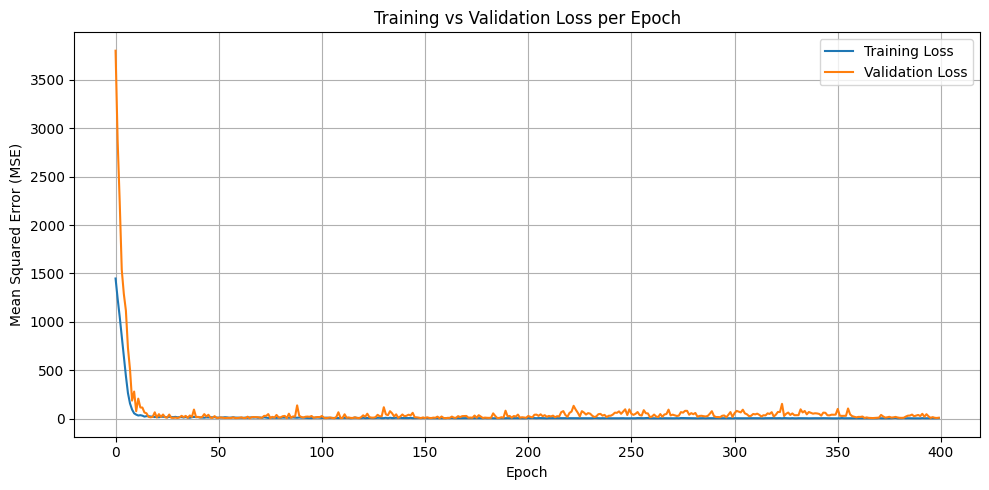

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
ytest_save=y_test
ypred_save=y_pred

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MLP")
#print(lr)
print(f"✅ MSE: {mse:.3f}")
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ MAE: {mae:.3f}")
print(f"✅ R²: {r2:.3f}")

MLP
✅ MSE: 9.025
✅ RMSE: 3.004
✅ MAE: 2.303
✅ R²: 0.906


In [ ]:
ytest_save[0:5]

,label
1896,87.38
1897,86.63
1898,90.18
1899,85.40
1900,88.13


In [ ]:

y_test[0:5]

,label
1896,87.38
1897,86.63
1898,90.18
1899,85.40
1900,88.13


In [ ]:
y_pred[0:5]

array([[82.214584],
       [84.21339 ],
       [83.69963 ],
       [86.35684 ],
       [82.66928 ]], dtype=float32)

#**Previous runs**

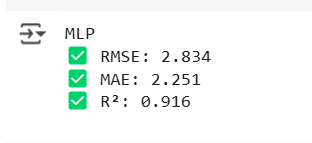

**With 400 iterations**
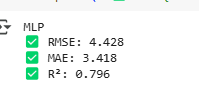

**with 200 iterations**
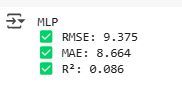

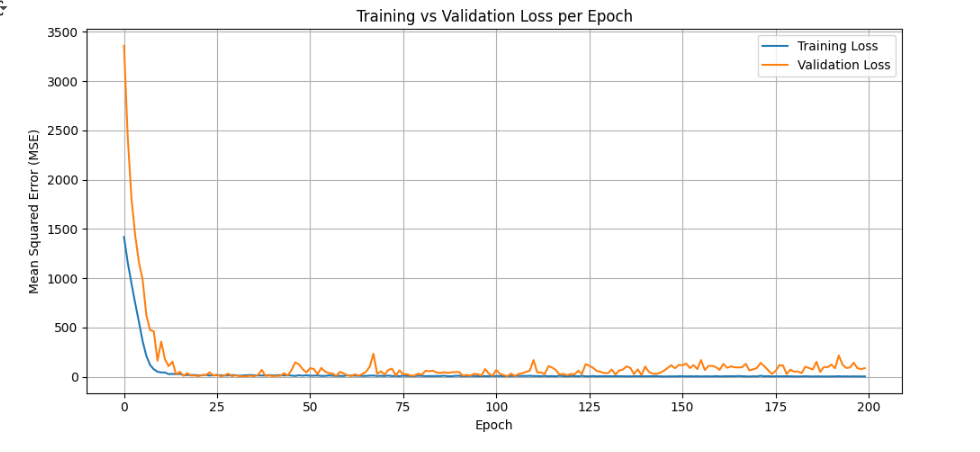


**with 300 iterations**

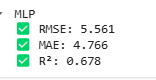

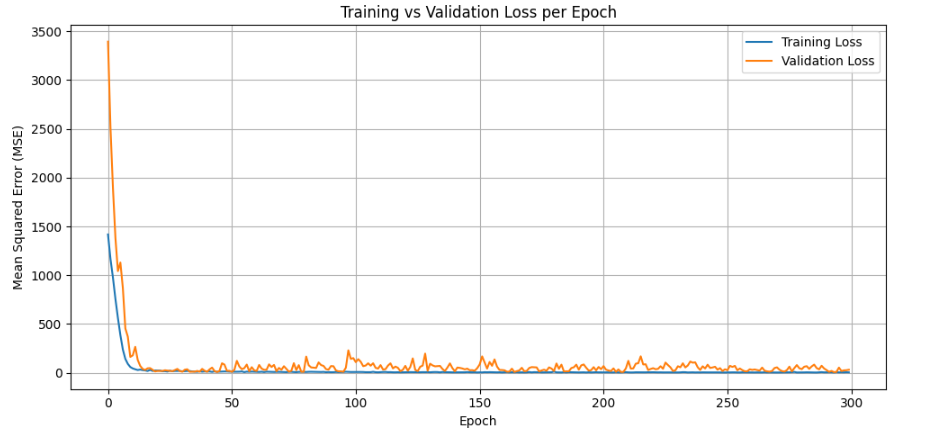

**with 450 iterations**
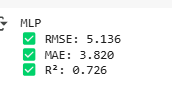

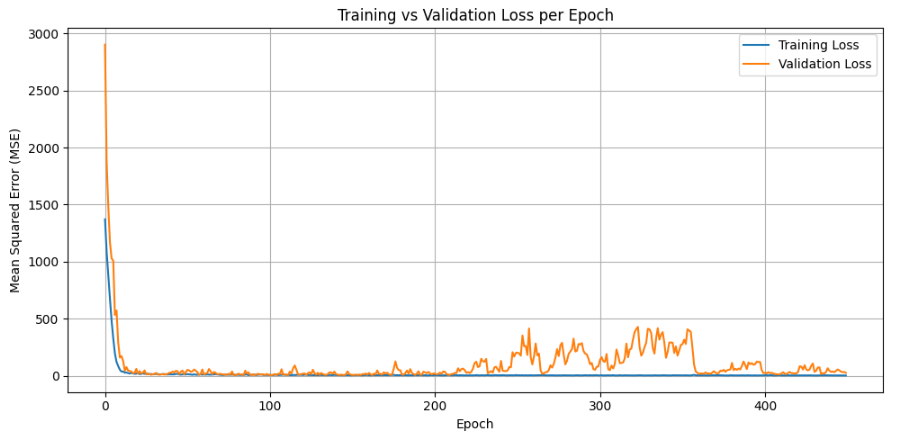

**with 500 iterations**
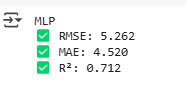

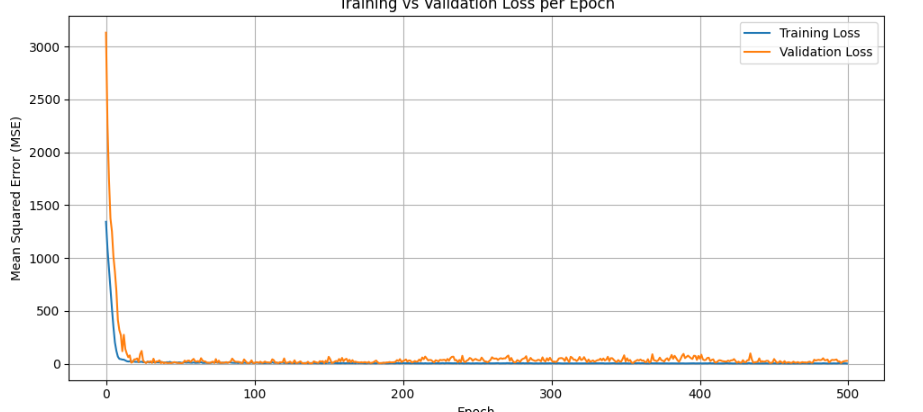

   Actual  Predicted
0   87.38  82.214584
1   86.63  84.213387
2   90.18  83.699631
3   85.40  86.356842
4   88.13  82.669281
5   89.40  84.189285
6   90.02  85.743149
7   90.80  85.833397
8   91.75  86.457001
9   96.00  87.952888


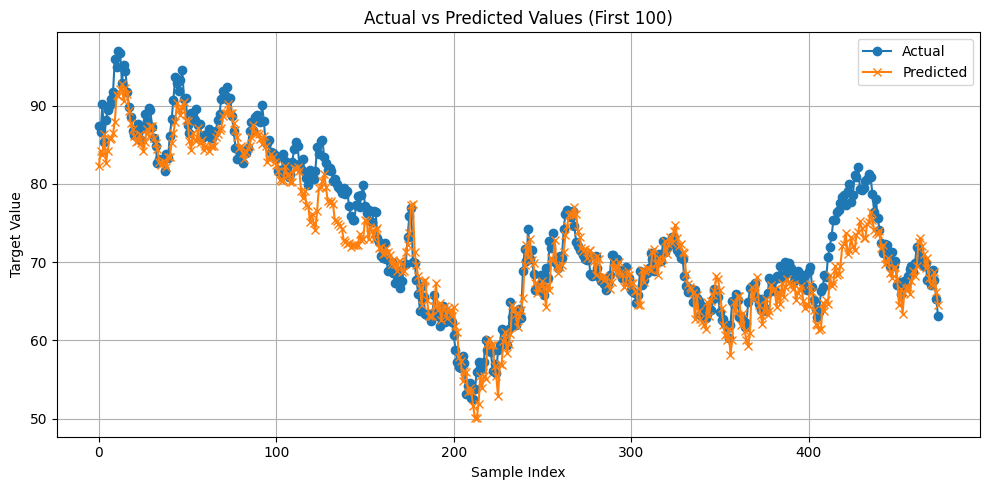

In [ ]:
import pandas as pd
y_test_1=y_test
y_pred_1=y_pred
# If y_test is a Series with index, reset it to align properly
comparison_df = pd.DataFrame({
    'Actual': y_test_1.reset_index(drop=True),
    'Predicted': pd.Series(y_pred_1.flatten())
})

# Print the first few rows
print(comparison_df.head(10))
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df['Predicted'].values, label='Predicted', marker='x')
plt.title("Actual vs Predicted Values (First 100)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# y_pred

Test MSE: 9.024596008114617
Test RMSE: 3.004096537748848
Test R²: 0.9061608624088172


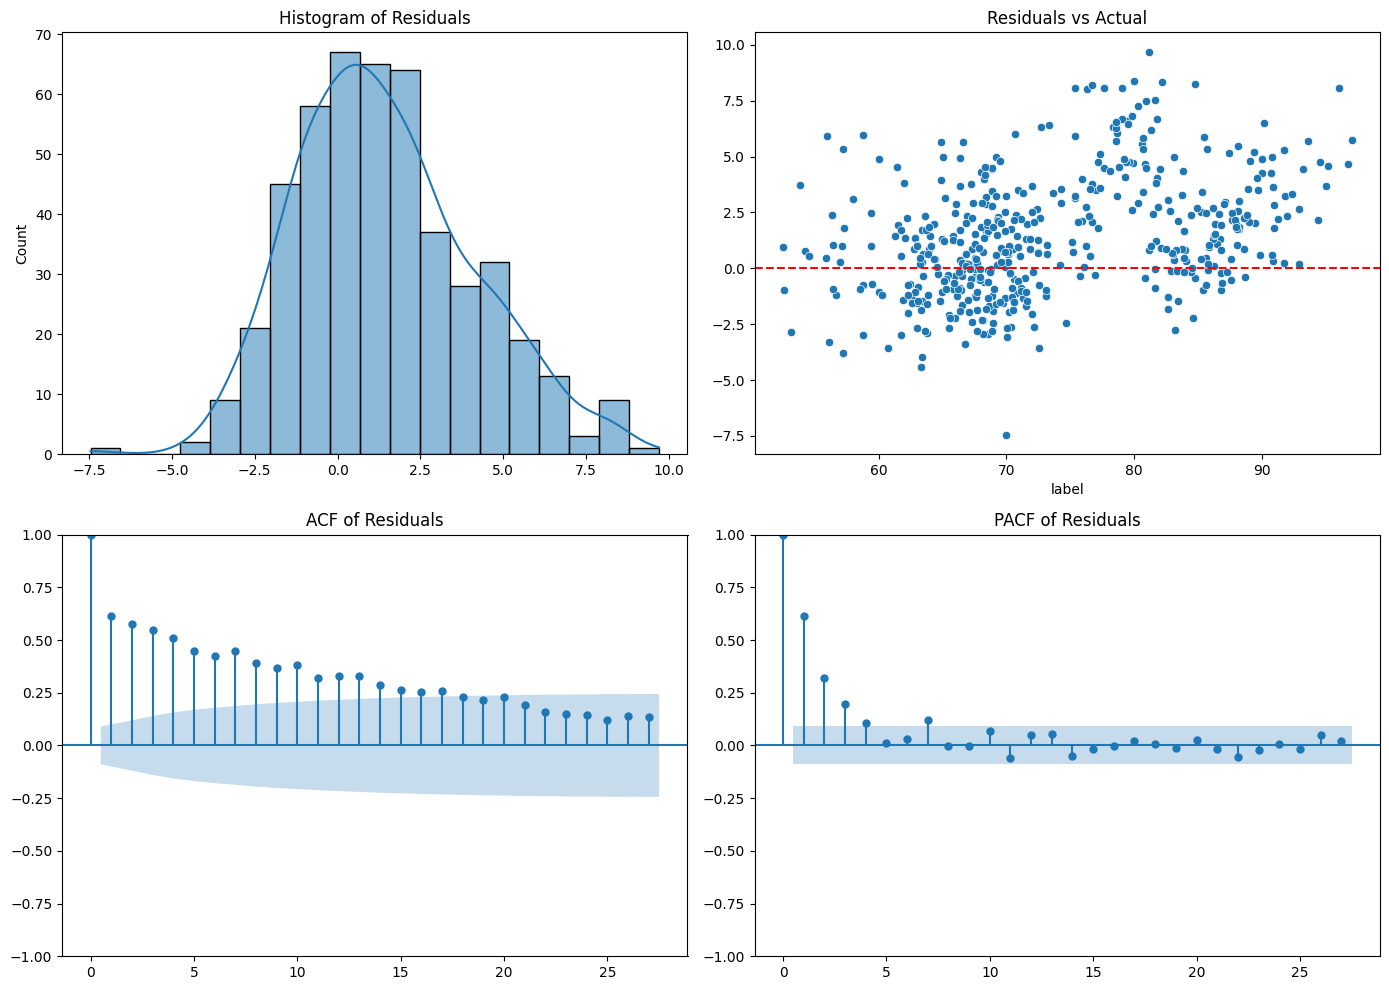

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R²:", r2)

# #true vs predicted
# plt.figure(figsize=(10, 5))
# plt.plot(y_test.values, label="True", marker='o')
# plt.plot(y_pred, label="Predicted", marker='x')
# plt.title("True vs Predicted on Test Set")
# plt.xlabel("Sample Index")
# plt.ylabel("Target Value")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

y_test_11=y_test
y_pred_11=y_pred
# Compute residuals
residuals = y_test_11.to_numpy().flatten() - y_pred_11.flatten()


# Residual analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(residuals, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Residuals")

sns.scatterplot(x=y_test_11, y=residuals, ax=axes[0, 1])
axes[0, 1].axhline(0, color='red', linestyle='--')
axes[0, 1].set_title("Residuals vs Actual")

plot_acf(residuals, ax=axes[1, 0])
axes[1, 0].set_title("ACF of Residuals")

plot_pacf(residuals, ax=axes[1, 1])
axes[1, 1].set_title("PACF of Residuals")

plt.tight_layout()
plt.show()

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


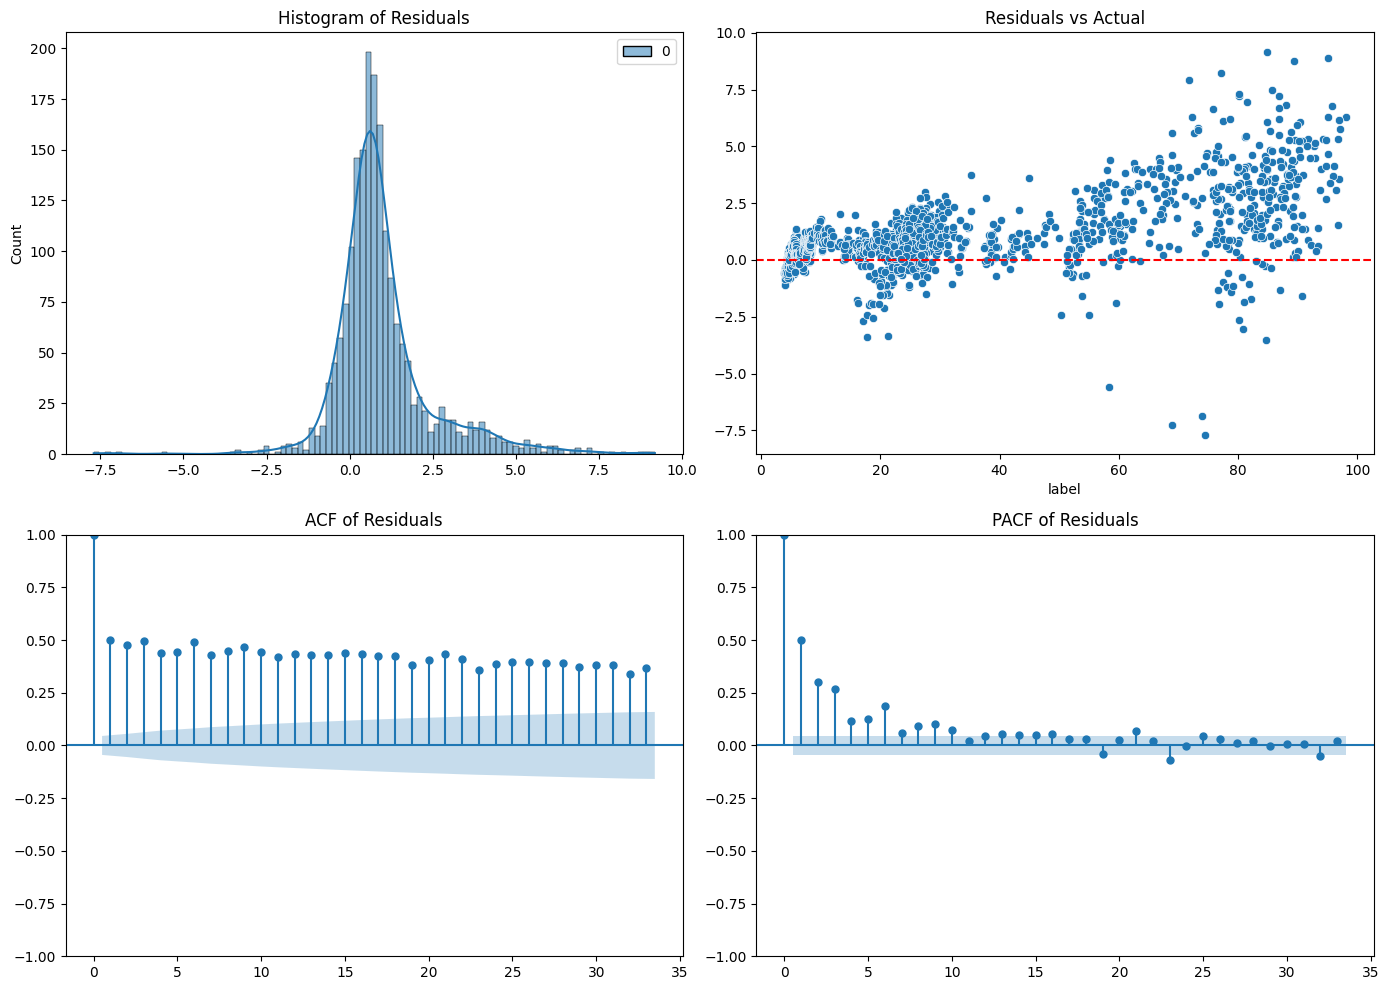

In [ ]:

y_pred_train = model.predict(X_train_scaled) # Use the reshaped array for prediction
y_train_1= y_train
residuals_1 = (y_train_1.to_numpy().flatten() - y_pred_train.flatten())
residuals= (y_train_1.to_numpy().flatten() - y_pred_train.flatten()).reshape(-1, 1)


# Residual analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(residuals, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Residuals")

sns.scatterplot(x=y_train_1, y=residuals_1, ax=axes[0, 1])
axes[0, 1].axhline(0, color='red', linestyle='--')
axes[0, 1].set_title("Residuals vs Actual")

plot_acf(residuals_1, ax=axes[1, 0])
axes[1, 0].set_title("ACF of Residuals")

plot_pacf(residuals_1, ax=axes[1, 1])
axes[1, 1].set_title("PACF of Residuals")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np # Import numpy if not already imported


# # Reshape X_train to have the expected shape (number of samples, number of features)
# X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1])

# # Convert X_train_reshaped to a NumPy array if it's not already
# X_train_reshaped = np.array(X_train_reshaped)

y_pred_train = model.predict(X_train_scaled) # Use the reshaped array for prediction

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Extract residuals from previous MLP
# residuals = (y_test - y_pred).values.reshape(-1, 1)
y_train_1= y_train
residuals = (y_train_1.to_numpy().flatten() - y_pred_train.flatten()).reshape(-1, 1)


# STEP 1: Split residuals into train and test first
split_index = int(len(residuals) * 0.8)
residuals_train = residuals[:split_index]
residuals_test = residuals[split_index:]

# STEP 2: Fit scaler on training residuals only
scaler_res = MinMaxScaler()
residuals_train_scaled = scaler_res.fit_transform(residuals_train)
residuals_test_scaled = scaler_res.transform(residuals_test)

def create_lstm_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_steps = 10

# STEP 3: Create sequences separately
X_train_lstm, y_train_lstm = create_lstm_sequences(residuals_train_scaled, n_steps)
X_test_lstm, y_test_lstm = create_lstm_sequences(residuals_test_scaled, n_steps)

# STEP 4: Build and train LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train_lstm, epochs=50, verbose=1)



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1288
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062
Epoch 16/50
48/48 ━━━━━━━━━━━━

In [ ]:
# STEP 5: Predict residuals on test data
y_pred_residual_scaled = model.predict(X_test_lstm)

# STEP 6: Inverse scale residuals to original range
y_pred_residual = scaler_res.inverse_transform(y_pred_residual_scaled)

# STEP 7: Align MLP predictions with LSTM predictions
# LSTM test predictions are shorter due to sequence offset
mlp_test_trimmed = y_pred_train[-len(y_pred_residual):]

# Combine predictions: MLP prediction + LSTM residual correction
# final_pred = mlp_test_trimmed + y_pred_residual.flatten()
final_pred = mlp_test_trimmed.flatten() + y_pred_residual.flatten()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
N = y_pred_residual.shape[0]  # should be 375
mlp_test_trimmed = y_pred_train[-N:]  # now correct shape


In [ ]:
# true_values.shape

In [ ]:
# final_pred.shape

In [ ]:


# Align the true test values
# true_values = y_train[-len(final_pred):]
true_values = y_train.to_numpy().flatten()[-len(final_pred):]
final_pred = final_pred.flatten()  # Just in case


# STEP 8: Evaluate hybrid model performance
final_mse = mean_squared_error(true_values, final_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(true_values, final_pred)
mae = mean_absolute_error(true_values, final_pred)

print("🎯 Hybrid Model Performance")
print("Hybrid MSE:", final_mse)
print("Hybrid MAE: ", mae)
print("Hybrid RMSE:", final_rmse)
print("Hybrid R²:", final_r2)

🎯 Hybrid Model Performance
Hybrid MSE: 5.554775676212859
Hybrid MAE:  1.7433253285176045
Hybrid RMSE: 2.3568571607572784
Hybrid R²: 0.9503143616228099


In [ ]:
# Flatten both to 1D arrays
y_test_flat = y_test.to_numpy().flatten()
y_pred_flat = y_pred.flatten()

# Now compute residuals
residuals = y_test_flat - y_pred_flat  # shape (N,)

residuals_test_scaled_MLPTEST = scaler_res.transform(residuals_test)
X_test_lstm, _ = create_lstm_sequences(residuals_test_scaled_MLPTEST, n_steps=5)
y_pred_residual_scaled = model.predict(X_test_lstm)
y_pred_residual = scaler_res.inverse_transform(y_pred_residual_scaled)
mlp_test_trimmed = y_pred[-len(y_pred_residual):]
final_pred = mlp_test_trimmed.flatten() + y_pred_residual.flatten()
true_values = y_test.to_numpy().flatten()[-len(final_pred):]


final_mse = mean_squared_error(true_values, final_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(true_values, final_pred)
mae = mean_absolute_error(true_values, final_pred)

print("Hybrid MSE:", final_mse)
print("Hybrid MAE: ", mae)
print("Hybrid RMSE:", final_rmse)
print("Hybrid R²:", final_r2)



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Hybrid MSE: 8.166528061158346
Hybrid MAE:  2.2067697770182293
Hybrid RMSE: 2.857713782231934
Hybrid R²: 0.8314898671845551


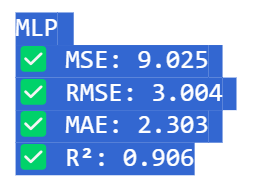

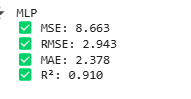

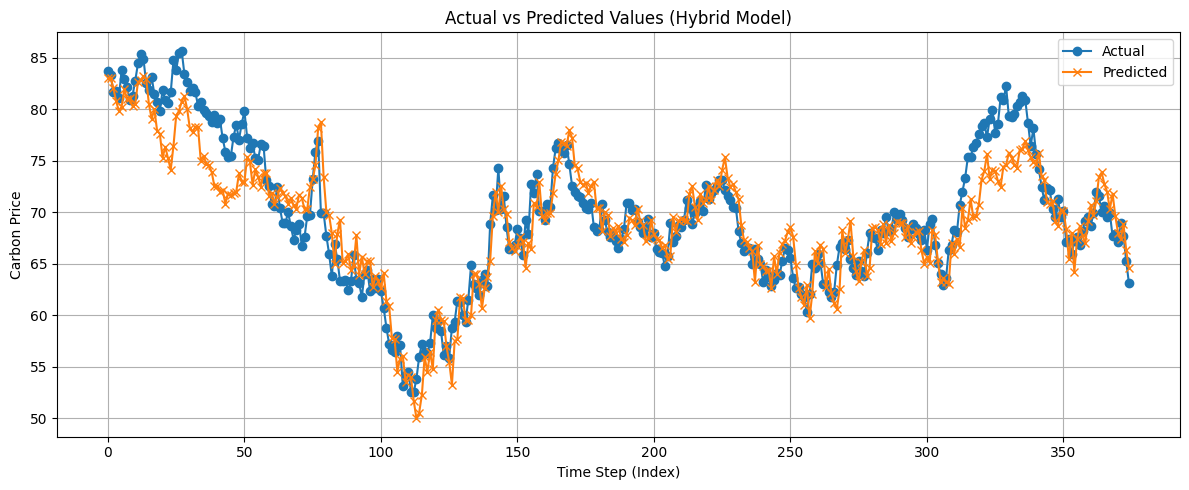

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(true_values, label='Actual', marker='o')
plt.plot(final_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Values (Hybrid Model)")
plt.xlabel("Time Step (Index)")
plt.ylabel("Carbon Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
